# Nayak, Anil Kumar
# 1001-396-015
# 2017-02-07
# Assignment_01_01

# Task 1
1. Cameraman gray scale image
2. Gaussian smoothing operator to the image and display the smoothed image

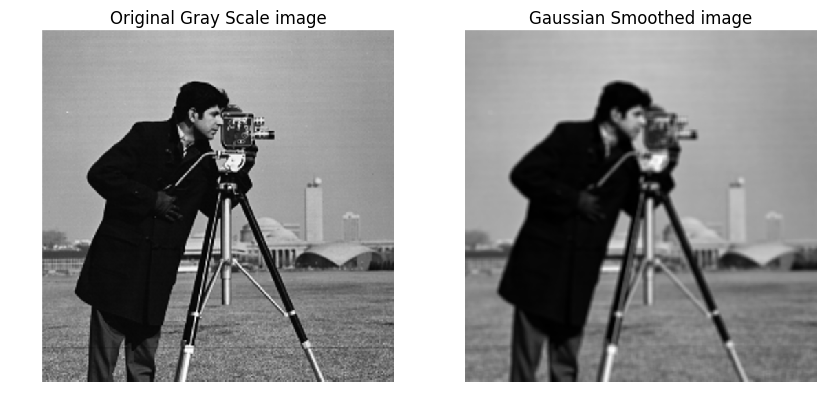

<function __main__.gaussion_smoothing_by_interactive_sigma_kernal_size>

In [1]:
from skimage import data
import matplotlib.pyplot as plt
from IPython.html.widgets import interact, fixed
from ipywidgets import FloatSlider, IntSlider, Label
from scipy.ndimage import convolve
import numpy as np
import scipy
plt.rcParams['image.interpolation'] = 'none'

def create_2d_gaussion_with_sigma_kernel(sigma=5.0,kernel_size=7):
    #Kernel size is odd every time
    kernel_size = kernel_size if kernel_size%2 else kernel_size+1
    temp_kernel = np.zeros((kernel_size, kernel_size))
    # set element at the middle to one
    temp_kernel[int(kernel_size/2), int(kernel_size/2)] = 1
    #scipy.ndimage.filters.gaussian_filter(temp_kernel, sigma=sigma, order=0, output=None, mode='reflect', cval=0.0)
    # gaussian-smooth the dirac, resulting in a gaussian filter mask
    return scipy.ndimage.filters.gaussian_filter(temp_kernel, 
           sigma=sigma, order=0, output=None, mode='reflect', cval=0.0)

def gaussion_smoothing(original_image,gaussion_kernel):
    smoothed_image = scipy.ndimage.convolve(original_image, gaussion_kernel)
    return smoothed_image

def gaussion_smoothing_by_interactive_sigma_kernal_size(original_image,sigma=5.0,kernel_size=7):
    gaussion_kernel = create_2d_gaussion_with_sigma_kernel(sigma,kernel_size)
    smoothed_image = gaussion_smoothing(original_image,gaussion_kernel)
       
    fig1, axes_array = plt.subplots(1, 2)
    fig1.set_size_inches(10,5)
    
    image_plot = axes_array[0].imshow(original_image ,cmap=plt.cm.gray)
    axes_array[0].axis('off')
    axes_array[0].set(title='Original Gray Scale image')
    
    image_plot = axes_array[1].imshow(smoothed_image ,cmap=plt.cm.gray)
    axes_array[1].axis('off')
    axes_array[1].set(title='Gaussian Smoothed image')
    
    plt.show()
    
cameraman_original_image = data.camera()
cameraman_original_image = np.asarray(cameraman_original_image,dtype=float)/255.0
interact(gaussion_smoothing_by_interactive_sigma_kernal_size,
         original_image=fixed(cameraman_original_image),
         sigma=FloatSlider(min=5., max=25., step=0.1,continuous_update=False),
         kernel_size=IntSlider(min=7, max=25, step=2,continuous_update=False)) 

# Task 2
# Apply Sobel operator to the smoothed image and display the magnitude and the direction of the edges as two separate images
1. Smooth image by gaussion with sigma and kernel Slider
2. Apply Sobel Operator 
3. Display the magnitude 
2. Direction of the gradient 

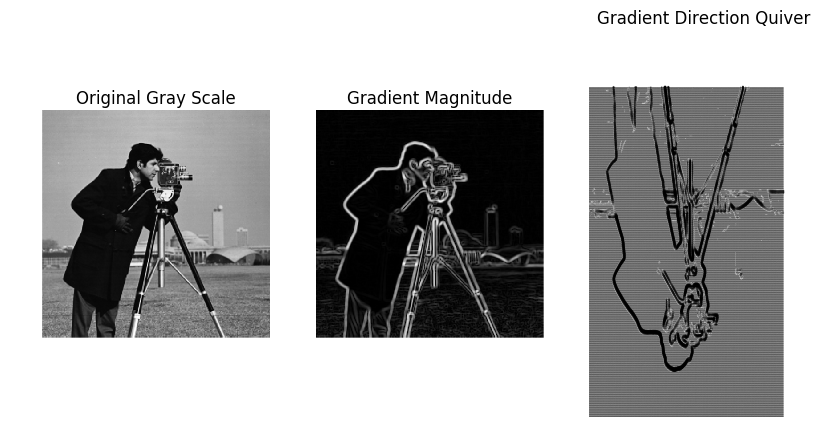

<function __main__.apply_sobel_operator>

In [2]:
%matplotlib inline
from skimage import data
import matplotlib.pyplot as plt
import numpy as np
import scipy


def magnitude_of_gradient(gradient_horizontal, gradient_vertical):
    magnitude_gradient = np.sqrt(gradient_horizontal**2+gradient_vertical**2)
    return magnitude_gradient

def direction_of_gradient(x_derivative, y_derivative):
    direction_gradient = np.arctan2(y_derivative,x_derivative)
    direction_gradient = 180 + (180/np.pi)*direction_gradient
    return direction_gradient

def sobel_operator_find_gradient(smoothed_image):
    horizontal_kernel = np.array([[ 1.,  2,  1],[ 0,  0,  0],[-1,-2,-1]])
    vertical_kernel = np.array([[ -1.,  0,  1],[ -2,  0,  2],[-1,0,1]])
    gradient_horizontal = scipy.ndimage.convolve(smoothed_image, horizontal_kernel)
    gradient_vertical = scipy.ndimage.convolve(smoothed_image, vertical_kernel)
    return gradient_vertical,gradient_horizontal

def apply_sobel_operator(original_image,sigma=5.0,kernel_size=7):
    #Create Gaussion Kernel 
    gaussion_kernel = create_2d_gaussion_with_sigma_kernel(sigma,kernel_size)
    
    #smooth image by gaussion kernel
    gaussian_smoothed_image = gaussion_smoothing(original_image,gaussion_kernel)
    
    #Apply Sobel Operator
    gradient_vertical,gradient_horizontal = sobel_operator_find_gradient(gaussian_smoothed_image)

    #Calculate Gradient magnitude
    magnitude_gradient = magnitude_of_gradient(gradient_horizontal,gradient_vertical)
    
    #Calculate Gradient Direction
    direction_gradient = direction_of_gradient(gradient_horizontal,gradient_vertical)
    
    #Display Gradient Image
    fig1, axes_array = plt.subplots(1, 3)
    fig1.set_size_inches(10,5)
    
    image_plot = axes_array[0].imshow(original_image ,cmap=plt.cm.gray)
    axes_array[0].axis('off')
    axes_array[0].set(title='Original Gray Scale')
    
    image_plot = axes_array[1].imshow(magnitude_gradient ,cmap=plt.cm.gray)
    axes_array[1].axis('off')
    axes_array[1].set(title='Gradient Magnitude')
    
    image_plot = axes_array[2].quiver(abs(gradient_horizontal),abs(gradient_vertical))
    axes_array[2].axis('off')
    axes_array[2].set(title='Gradient Direction Quiver')
    
    plt.show()


interact(apply_sobel_operator,
         original_image=fixed(cameraman_original_image),
         sigma=FloatSlider(min=5., max=25., step=0.1,continuous_update=False),
         kernel_size=IntSlider(min=7, max=25, step=2,continuous_update=False)) 

# Below Image will give a perfect picture of the 150:200 region of the image and it's Direction as above gives the whole image and quiver is not comprehensive to show arrow so close

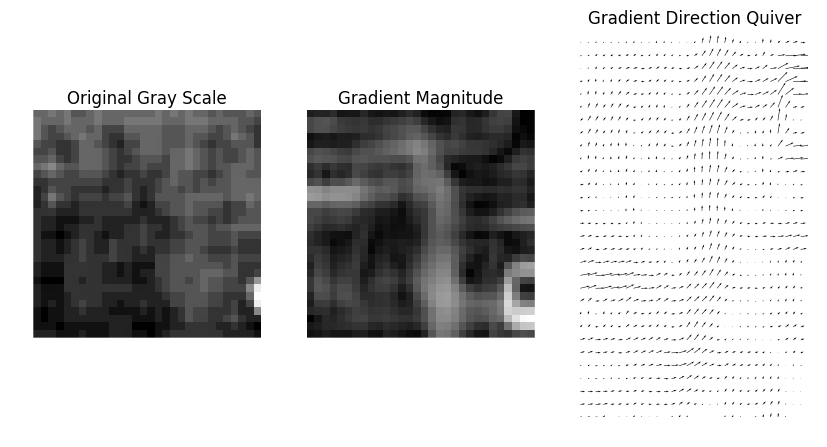

<function __main__.apply_sobel_operator>

In [3]:
cameraman_original_image = cameraman_original_image[150:180,150:180]

interact(apply_sobel_operator,
         original_image=fixed(cameraman_original_image),
         sigma=FloatSlider(min=5., max=25., step=0.1,continuous_update=False),
         kernel_size=IntSlider(min=7, max=25, step=2,continuous_update=False)) 

# Task 3

# Apply the non-maximum suppression algorithm and display the result as a gray scale image

# References
1. https://pdfs.semanticscholar.org/52ca/4ed04d1d9dba3e6ae30717898276735e0b79.pdf

Steps For Non Maximum Supression
1. Filter Image with 2d Gaussion Kernel - Done
2. Find the Derivative of X and Y - Done
3. Display the X and Y derivative Images - Done
4. Find the Magnitude and Orientation of the Gradient
5. Diaplay magnitude and Orientation of the Gradient

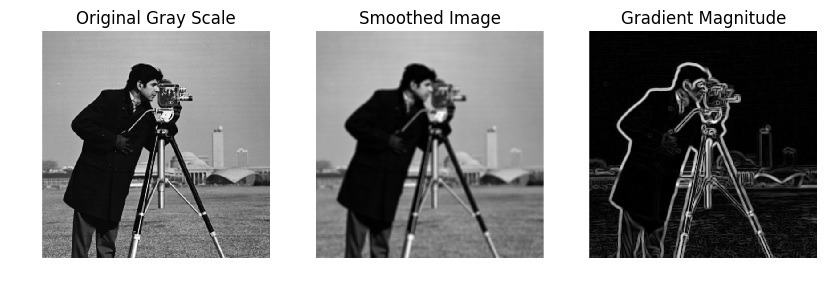

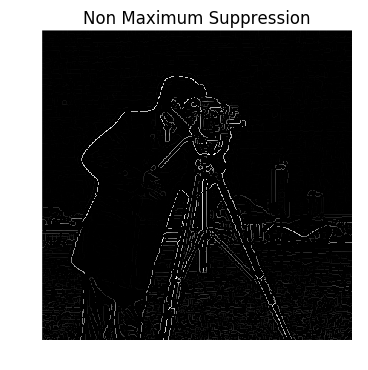

<function __main__.non_maximum_supression_step_wise>

In [8]:
%matplotlib inline
from skimage import data
from IPython.html.widgets import interact, fixed
from ipywidgets import FloatSlider, IntSlider, Label
import scipy
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
plt.rcParams['image.interpolation'] = 'none'

def normalize_angels(direction_image):
    x0,y0 = np.where(((direction_image<22.5)+(direction_image>157.5)*(direction_image<202.5)+(direction_image>337.5)) == True)
    x45,y45 = np.where( ((direction_image>22.5)*(direction_image<67.5)+(direction_image>202.5)*(direction_image<247.5)) == True)
    x90,y90 = np.where( ((direction_image>67.5)*(direction_image<112.5)+(direction_image>247.5)*(direction_image<292.5)) == True)
    x135,y135 = np.where( ((direction_image>112.5)*(direction_image<157.5)+(direction_image>292.5)*(direction_image<337.5)) == True)

    direction_image_normalized = direction_image.copy()
    direction_image_normalized[x0,y0] = 0
    direction_image_normalized[x45,y45] = 45
    direction_image_normalized[x90,y90] = 90
    direction_image_normalized[x135,y135] = 135
    
    return direction_image_normalized

def non_maximum_supression(magnitude_image,normalized_direction_image):
    non_max_suppression_img = magnitude_image.copy()
    x,y = np.shape(non_max_suppression_img)
    
    for i in range(x):
        for j in range(y):
            if normalized_direction_image[i,j] == 0:
                maximum = find_local_maximum(magnitude_image,i,j,1,0,-1,0)
                if not maximum:
                    non_max_suppression_img[i,j] = 0
 
            elif normalized_direction_image[i,j] == 45:
                maximum = find_local_maximum(magnitude_image,i,j,1,-1,-1,1)
                if not maximum:
                    non_max_suppression_img[i,j] = 0
 
            elif normalized_direction_image[i,j] == 90:
                maximum = find_local_maximum(magnitude_image,i,j,0,1,0,-1)
                if not maximum:
                    non_max_suppression_img[i,j] = 0
            
            elif normalized_direction_image[i,j] == 135:
                maximum = find_local_maximum(magnitude_image,i,j,1,1,-1,-1)
                if not maximum:
                    non_max_suppression_img[i,j] = 0
    
    return non_max_suppression_img

def find_local_maximum(magnitude,i,j,x1,y1,x2,y2):
    try:
        if (magnitude[i,j] > magnitude[i+x1,j+y1]) and (magnitude[i,j] > magnitude[i+x2,j+y2]):
            return 1
        else:
            return 0  
    except IndexError:
            return -1
        
def non_maximum_supression_step_wise(original_image,sigma=5.0,kernel_size=7):
    gaussion_kernel = create_2d_gaussion_with_sigma_kernel(sigma,kernel_size)
    gaussian_smoothed_image = gaussion_smoothing(original_image,gaussion_kernel)
    gradient_vertical,gradient_horizontal = sobel_operator_find_gradient(gaussian_smoothed_image)
    magnitude_gradient = magnitude_of_gradient(gradient_horizontal,gradient_vertical)
    direction_gradient = direction_of_gradient(gradient_horizontal,gradient_vertical)
    normalized_direction_image = normalize_angels(direction_gradient)
    non_max_suppression_img = non_maximum_supression(magnitude_gradient,normalized_direction_image)
    
    fig1, axes_array = plt.subplots(1, 3)
    fig1.set_size_inches(10,5)
    
    image_plot = axes_array[0].imshow(original_image ,cmap=plt.cm.gray)
    axes_array[0].axis('off')
    axes_array[0].set(title='Original Gray Scale')
    
    image_plot = axes_array[1].imshow(gaussian_smoothed_image ,cmap=plt.cm.gray)
    axes_array[1].axis('off')
    axes_array[1].set(title='Smoothed Image')
    
    image_plot = axes_array[2].imshow(magnitude_gradient ,cmap=plt.cm.gray)
    axes_array[2].axis('off')
    axes_array[2].set(title='Gradient Magnitude')
    
    plt.figure()
    plt.imshow(non_max_suppression_img ,cmap=plt.cm.gray)
    plt.axis('off')
    plt.title('Non Maximum Suppression')
    
    
    plt.show()
                                                     
cameraman_original_image = data.camera()
cameraman_original_image = np.asarray(cameraman_original_image,dtype=float)/255.0                                                     
interact(non_maximum_supression_step_wise,
         original_image=fixed(cameraman_original_image),
         sigma=FloatSlider(min=5., max=25., step=0.1,continuous_update=False),
         kernel_size=IntSlider(min=7, max=25, step=2,continuous_update=False)) 

# Task 4

Apply the double threshold algorithm and display the result as a binary image

Double Threshold principle
1. High Threshold
    1. To detect the starting point of an edge
    2. Find out the high threshold point to select for the starting of edge point detection
2. Low Threshold
    to fill the continuity of the edge

# References
1. https://www.researchgate.net/publication/220604236_A_double-threshold_image_binarization_method_based_on_edge_detector
2. https://pdfs.semanticscholar.org/52ca/4ed04d1d9dba3e6ae30717898276735e0b79.pdf

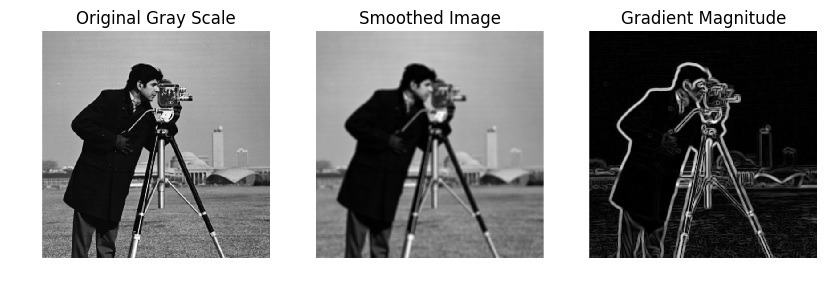

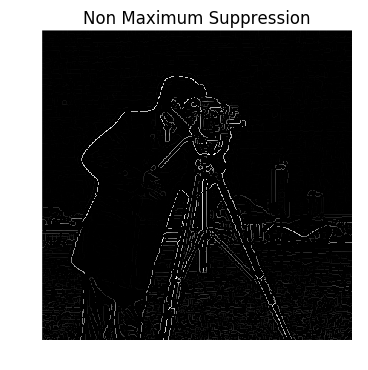

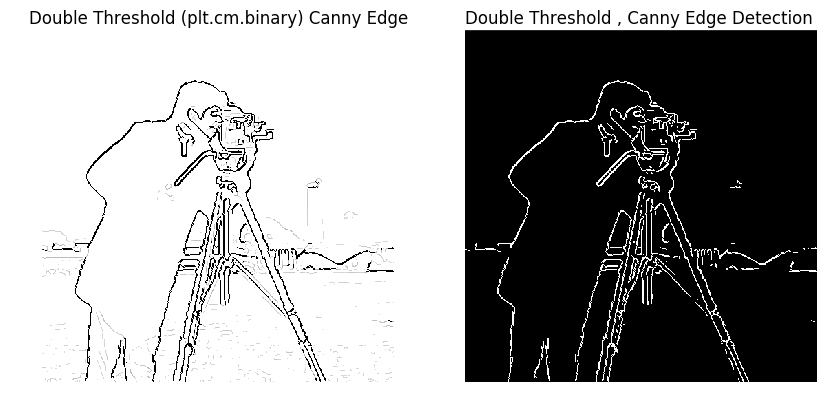

<function __main__.double_threshold_algorithm_step_wise>

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.html.widgets import interact, fixed
from ipywidgets import FloatSlider, IntSlider, Label, FloatRangeSlider
import scipy
from skimage import data
import numpy as np
from PIL import Image
plt.rcParams['image.interpolation'] = 'none'

def double_threshold_algorithm(threshold_range,non_maximum_suppression_image):
    double_th_image = non_maximum_suppression_image.copy()
    threshold_low = threshold_range[0]
    threshold_high = threshold_range[1]
    
    x,y = np.shape(non_maximum_suppression_image)
    
    high_th_image = np.where(non_maximum_suppression_image>=threshold_high,1,0)
    low_th_image = np.where(non_maximum_suppression_image<threshold_low,1,0)
    
    main_im = high_th_image + (np.ones(non_maximum_suppression_image.shape)-high_th_image-low_th_image)*non_maximum_suppression_image
    

    for i in range(1,x-1,1):
        for j in range(1,y-1,1):
            connecting_point = -1
            if (main_im[i][j] == 1):
                connecting_point = find_8_neighbour_to_start_edge_connection(main_im,i,j,1)
            elif(main_im[i][j] >= 0):
                connecting_point = find_8_neighbour_to_start_edge_connection(main_im,i,j,0)
            
            if(connecting_point!=-1):
                u = connecting_point[0]
                v = connecting_point[1]
                main_im[u][v] = 1
     
    
    return main_im


def find_8_neighbour_to_start_edge_connection(main_im,i,j,check):
    range_mat_8_cell = [-1,0,1]
    for n in range_mat_8_cell:
        for m in range_mat_8_cell:
            if (n == 0 & m == 0):
                #center cell
                continue
            x = i+n
            y = j+m

            try:
                if(check==1):
                    if (main_im[x,y] >= 0): 
                        return [x,y]
                elif(check==0):
                    if (main_im[x,y] == 1): 
                        return [x,y]
            except IndexError:
                return -1
    return -1

def double_threshold_algorithm_step_wise(original_image,sigma=2.0,kernel_size=3,threshold_range=[0.2,0.8]):
    gaussion_kernel = create_2d_gaussion_with_sigma_kernel(sigma,kernel_size)
    gaussian_smoothed_image = gaussion_smoothing(original_image,gaussion_kernel)
    gradient_vertical,gradient_horizontal = sobel_operator_find_gradient(gaussian_smoothed_image)
    magnitude_gradient = magnitude_of_gradient(gradient_horizontal,gradient_vertical)
    direction_gradient = direction_of_gradient(gradient_horizontal,gradient_vertical)
    normalized_direction_image = normalize_angels(direction_gradient)
    non_maximum_suppression_image = non_maximum_supression(magnitude_gradient,normalized_direction_image)
    
    canny_edge_detection_double_threshold = double_threshold_algorithm(threshold_range,non_maximum_suppression_image)
    
    fig1, axes_array = plt.subplots(1, 3)
    fig1.set_size_inches(10,5)
    
    image_plot = axes_array[0].imshow(original_image ,cmap=plt.cm.gray)
    axes_array[0].axis('off')
    axes_array[0].set(title='Original Gray Scale')
    
    image_plot = axes_array[1].imshow(gaussian_smoothed_image ,cmap=plt.cm.gray)
    axes_array[1].axis('off')
    axes_array[1].set(title='Smoothed Image')
    
    image_plot = axes_array[2].imshow(magnitude_gradient ,cmap=plt.cm.gray)
    axes_array[2].axis('off')
    axes_array[2].set(title='Gradient Magnitude')
    
    plt.figure()
    plt.imshow(non_maximum_suppression_image ,cmap=plt.cm.gray)
    plt.axis('off')
    plt.title('Non Maximum Suppression')
   
    fig1, axes_array = plt.subplots(1, 2)
    fig1.set_size_inches(10,5)
    
    image_plot = axes_array[0].imshow(canny_edge_detection_double_threshold ,cmap=plt.cm.binary)
    axes_array[0].axis('off')
    axes_array[0].set(title='Double Threshold (plt.cm.binary) Canny Edge')    
        
    x,y = np.where(canny_edge_detection_double_threshold == 1)
    canny_edge_detection_double_threshold[:,:] = 0
    canny_edge_detection_double_threshold[x,y] = 1
    image_plot = axes_array[1].imshow(canny_edge_detection_double_threshold ,cmap=plt.cm.gray)
    axes_array[1].axis('off')
    axes_array[1].set(title='Double Threshold , Canny Edge Detection ')

    plt.show()

cameraman_original_image = data.camera()
cameraman_original_image = np.asarray(cameraman_original_image,dtype=float)/255.0
interact(double_threshold_algorithm_step_wise,
         original_image = fixed(cameraman_original_image),
         sigma=FloatSlider(min=5., max=25., step=0.1,continuous_update=False),
         kernel_size=IntSlider(min=7, max=25, step=2,continuous_update=False),
         threshold_range=FloatRangeSlider(min=0.01, max=1, step=0.01,value=[0.14,0.32],continuous_update=False))